# LAB 6 - Decision Tree
Akshay V

AM.EN.U4CSE19005

In [72]:
#import statements
import numpy as np
import pandas as pd
import random
import math
from math import log2
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error as ME,mean_absolute_error as MAE,mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [204]:
#data Loading
data = pd.read_csv('/content/drive/MyDrive/ML/Lab6/car.csv')
X = pd.DataFrame(data)
X.head()

,buying_price,maint_price,doors,capacity,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [189]:

X[' maint_price'] = X[' maint_price'].replace({'vhigh' :3 , 'high' : 2, 'med' : 1, 'low':  0})
X[' safety'] = X[' safety'].replace({'high' : 2, 'med' : 1, 'low':  0})
X[' lug_boot'] = X[' lug_boot'].replace({'big' : 2, 'med' : 1, 'small':  0})
X[' doors'] = X[' doors'].replace({'5more': 5})
X[' capacity'] = X[' capacity'].replace({'more': 5})
X['buying_price'] = X['buying_price'].replace({'vhigh' :3 , 'high' : 2, 'med' : 1, 'low':  0})

In [95]:
#selection of columns
x=X.iloc[:,0:]
del x[' target']
y=X[' target']

### 2. Define a function to calculate the entropy of a dataset, S, based on the target variable. 

 

              Entropy(S) = ∑pilog(pi)
 
 

 

Where pi is the probability of class i 

In [17]:
counts = y.value_counts()
total = y.count()
counts

unacc    1210
acc       384
good       69
vgood      65
Name:  target, dtype: int64

In [20]:
# proportion of examples in each class
unacc = counts[0]/total
acc = counts[1]/total
good = counts[2]/total
vgood = counts[3]/tota

In [23]:
def Entropy(classes):
  # calculate entropy
  entropy = 0
  for i in classes:
    entropy += i * log2(i)
  entropy *= -1
  return entropy

In [133]:
classes = [unacc, acc, good, vgood]
entropy = Entropy(classes)
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.206 bits


### Consider ‘buying’ attribute of car dataset. Find unique values in the dataset for ‘buying’ attribute.  Find expected information gain when ‘buying’ attribute becomes known 

 

 
```
Gain(S,buying)=Entropy(S)−1/∣∣∣S∣∣∣∑|Sv|Entropy(Sv)
 ```
 
### Where Sv is the subset of dataset with v value in buying attribute. 

In [166]:
def calc_entropy(column):
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    prob = counts / len(column)
    
    # print(prob)
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for i in prob:
      if i > 0:
        entropy += i * log2(i)
    
    return -entropy

In [167]:
print(calc_entropy(x['buying_price']))

2.0


In [190]:
X[' target'] = X[' target'].replace({'unacc' : 3 , 'acc' : 2, 'good' : 1, 'vgood':  0})

In [191]:
X[' target'].value_counts()

3    1210
2     384
1      69
0      65
Name:  target, dtype: int64

In [168]:
def calc_information_gain(data, split_name, target_name):
    entropy = calc_entropy(data[target_name])
    
    values = data[split_name].unique()
    
    split = []
    for i in values:
      split.append(data[data[split_name] == i])
    
    sub = 0
    for subset in split:
        prob = (subset.shape[0] / data.shape[0]) 
        sub += prob * calc_entropy(subset[target_name])

    return entropy - sub

In [192]:
calc_information_gain(X, 'buying_price', ' target')

0.09644896916961354

### Repeat Q.3 for all attributes and find the attribute with maximum gain. 

In [202]:
def highest_info_gain(columns):
  information_gains = {}
  
  for col in columns[0:-1]:
    information_gain = calc_information_gain(X, col, columns[-1])
    information_gains[col] = information_gain             
  return max(information_gains, key=information_gains.get)

In [203]:
highest_info_gain(X.columns)

' safety'

### 4. Use the predefined function to do the training using decision tree. 

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=10)

In [98]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [99]:


y_pred = clf_entropy.predict(X_test)

In [109]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

print("Precision:",metrics.precision_score(Y_test, y_pred, average = 'weighted'))

print("Recall:",metrics.recall_score(Y_test, y_pred, average = 'weighted'))

Accuracy: 0.8073217726396917
Precision: 0.7358209215145631
Recall: 0.8073217726396917


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
print(metrics.classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

         acc       0.51      0.56      0.53       102
        good       0.00      0.00      0.00        21
       unacc       0.89      0.98      0.93       371
       vgood       0.00      0.00      0.00        25

    accuracy                           0.81       519
   macro avg       0.35      0.38      0.37       519
weighted avg       0.74      0.81      0.77       519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


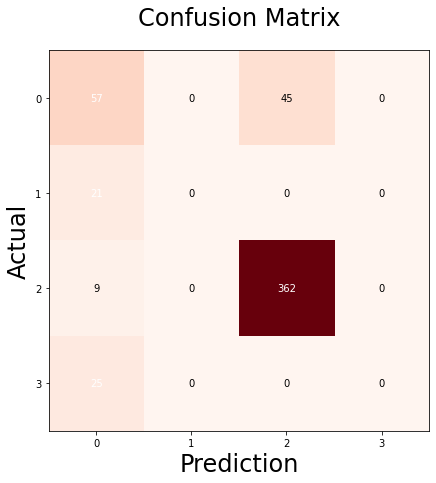

In [111]:
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_matrix, figsize=(7, 7), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize=24)
plt.ylabel('Actual', fontsize=24)
plt.title('Confusion Matrix', fontsize=24)
plt.show()

### 5.Compare the results of Decision tree with kNN and Logistic regression.  

#### KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train,Y_train)

y_pred_KNN= knn.predict(X_test)

In [113]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_KNN))

print("Precision:",metrics.precision_score(Y_test, y_pred_KNN, average = 'weighted'))

print("Recall:",metrics.recall_score(Y_test, y_pred_KNN, average = 'weighted'))

Accuracy: 0.928709055876686
Precision: 0.9377327761872941
Recall: 0.928709055876686


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_LR = lr.predict(X_test)

In [115]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_LR))

print("Precision:",metrics.precision_score(Y_test, y_pred_LR, average = 'weighted'))

print("Recall:",metrics.recall_score(Y_test, y_pred_LR, average = 'weighted'))

Accuracy: 0.8689788053949904
Precision: 0.8662753062860955
Recall: 0.8689788053949904


#### Compare DT, KNN and Logistic Regression

In [117]:
print("Accuracy of DT:",metrics.accuracy_score(Y_test, y_pred))
print("Accuracy of KNN:",metrics.accuracy_score(Y_test, y_pred_KNN))
print("Accuracy of LR :",metrics.accuracy_score(Y_test, y_pred_LR))
print()
print("Precision of DT:",metrics.precision_score(Y_test, y_pred, average = 'weighted'))
print("Precision of KNN:",metrics.precision_score(Y_test, y_pred_KNN, average = 'weighted'))
print("Precision of LR :",metrics.precision_score(Y_test, y_pred_LR, average = 'weighted'))
print()
print("Recall of DT:",metrics.recall_score(Y_test, y_pred, average = 'weighted'))
print("Recall of KNN:",metrics.recall_score(Y_test, y_pred_KNN, average = 'weighted'))
print("Recall of LR :",metrics.recall_score(Y_test, y_pred_LR, average = 'weighted'))


Accuracy of DT: 0.8073217726396917
Accuracy of KNN: 0.928709055876686
Accuracy of LR : 0.8689788053949904

Precision of DT: 0.7358209215145631
Precision of KNN: 0.9377327761872941
Precision of LR : 0.8662753062860955

Recall of DT: 0.8073217726396917
Recall of KNN: 0.928709055876686
Recall of LR : 0.8689788053949904


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
